Importing Libraries

In [336]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### **Question 1 - Creating Feature Set**



Q1(a). 10 Vectors with mean [1 0]

In [210]:
mean1 = [1,0]
var1 = [[1,0], [0,1]]
N1=10
set1 = np.random.multivariate_normal(mean1,var1,N1)
set1

array([[ 2.58407121, -0.24846712],
       [ 2.62234119, -0.67554341],
       [ 1.54604417, -0.18068314],
       [ 1.20106974,  0.20788705],
       [ 0.46311659,  0.01537821],
       [-1.06945542,  0.51254924],
       [ 1.19015781,  0.79993913],
       [ 1.96378444,  0.17509023],
       [ 0.56735904,  0.33647733],
       [-0.75621649, -0.37887673]])

Q1(a). 10 Vectors with mean [0 1]

In [211]:
mean2 = [0,1]
var2 = [[1,0], [0,1]]
N2=10
set2 = np.random.multivariate_normal(mean2,var2,N2)
set2

array([[ 0.89857829,  1.25747573],
       [-0.36543197,  2.15619434],
       [ 0.70057614,  0.56504691],
       [ 0.42993278,  1.69543521],
       [-0.67975376,  0.59698648],
       [ 0.02324273,  1.15254339],
       [ 0.25256789,  1.34584079],
       [ 0.69899663,  1.28167378],
       [ 0.42541248,  0.6748653 ],
       [-0.20865197,  2.09998689]])

Q1(b). Generation of first set of 100 feature vectors

In [212]:
cov1_1=[[0.1,0],[0,0.1]]
N3=10
set1_1 =[]
for i in range(0,10):
  set1_1.append(np.random.multivariate_normal(set1[i], cov1_1,N3))

Reshaping

In [213]:
data1=np.array(set1_1)
data1=data1.reshape(100,2)

Making DataFrame

In [214]:
df1 = pd.DataFrame(data1,columns=['feature1', 'feature2'])
df1['y']=1
df1

,feature1,feature2,y
0,2.673169,-0.484491,1
1,2.282819,-0.170177,1
2,2.317924,-0.518357,1
3,2.562748,-0.478862,1
4,2.870942,-0.003974,1
...,...,...,...
95,-0.358317,-0.303447,1
96,-0.998186,-0.710174,1
97,-0.261038,-0.777554,1
98,-0.700080,-0.429853,1


Q1(c). Generation of second set of 100 feature vectors

In [215]:
cov2_1=[[0.1,0],[0,0.1]]
N4=10
set2_1 =[]
for i in range(0,10):
  set2_1.append(np.random.multivariate_normal(set2[i], cov2_1,N4))

Reshaping

In [216]:
data2=np.array(set2_1)
data2=data2.reshape(100,2)

Making DataFrame

In [217]:
df2 = pd.DataFrame(data2,columns=['feature1', 'feature2'])
df2['y']=-1
df2

,feature1,feature2,y
0,0.881708,1.630474,-1
1,0.945479,1.782322,-1
2,1.360950,2.049269,-1
3,1.295402,1.058563,-1
4,1.464085,0.681789,-1
...,...,...,...
95,-0.300273,1.602248,-1
96,-0.431519,2.319151,-1
97,-0.446603,1.594085,-1
98,0.006538,2.325401,-1


Combining the two DataFrames

In [218]:
Data = pd.concat([df1,df2])
Data.columns=['X1','Y1','y']
Data

,X1,Y1,y
0,2.673169,-0.484491,1
1,2.282819,-0.170177,1
2,2.317924,-0.518357,1
3,2.562748,-0.478862,1
4,2.870942,-0.003974,1
...,...,...,...
95,-0.300273,1.602248,-1
96,-0.431519,2.319151,-1
97,-0.446603,1.594085,-1
98,0.006538,2.325401,-1


Scatter Plot

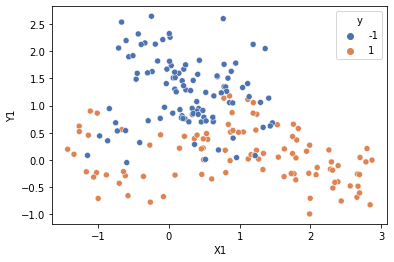

In [219]:
sns.scatterplot(data=Data,x='X1',y='Y1',hue="y", palette='deep')

### **Question 2 - Linear Classifier**

Converting DataFrame into Input and Target Array

In [330]:
X_test = Data.iloc[:, :-1].values
y_test = Data.iloc[:, -1].values

Making the Logistic Regression Model

In [331]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, learning_rate=0.02, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            x = np.dot(X, self.w) + self.b
            h_theta = sigmoid(x)

            dw = (1/n_samples) * np.dot(X.T, (h_theta - y))
            db = (1/n_samples) * np.sum(h_theta-y)

            self.w = self.w - self.learning_rate*dw
            self.b = self.b - self.learning_rate*db

    def predict(self, X, threshold=0.5):
        x = np.dot(X, self.w) + self.b
        h_theta = sigmoid(x)
        class_pred=[]
        for y in h_theta:
          if y<=threshold:
            class_pred.append(-1)
          else:
            class_pred.append(1)
        return class_pred

Testing the model

In [332]:
clf = LogisticRegression()
clf.fit(X_test,y_test)
y_pred = clf.predict(X_test)

Plotting Classifying Line

(47, 53)


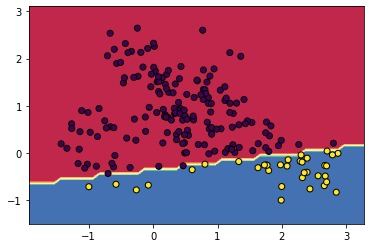

In [333]:
#Defining Limits of the Plot
X_min, X_max = X_test[:,0].min()-0.5, X_test[:,0].max()+0.5
Y_min, Y_max = X_test[:,1].min()-0.5, X_test[:,1].max()+0.5

dx = 0.1 #step size

#Defining scale and grids of the plot
X_grid = np.arange(X_min,X_max,dx)
Y_grid = np.arange(Y_min,Y_max,dx)
XX, YY = np.meshgrid(X_grid, Y_grid)
print(XX.shape)

#Model Details
classifier = LogisticRegression()
classifier.fit(X_test, y_test)
Z = classifier.predict(np.c_[XX.ravel(), YY.ravel()])
Z = np.array(Z)
Z = Z.reshape(XX.shape)

#Plotting
plt.contourf(XX, YY, Z, cmap=plt.cm.Spectral)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolors='k')
plt.show()

Calculating the Training Error

In [334]:
#Sum of square of errors
Error_Sq = 0
for i in range (200):
  diff = np.abs(y_pred[i]-y_test[i])
  Error_Sq +=diff**2

print(Error_Sq)
#Mean
Training_Error = Error_Sq/200
print("The Training Error for the classifier is :", Training_Error )


260
The Training Error for the classifier is : 1.3


### **Question 3 - K-Nearest Neighnour Classifier using Euclidean Distance for K=15**

Making the KNN Classifier

In [343]:
class KNN:
  def _init_(self,k):
    self.k = k

  def fit(self, input, target):
    self.X = input
    self.y = target

  def predict(self, X_test):
    predictions = []
    for x in X_test:
      distances = []
      for xi in self.X:
        diff = x - xi
        euclidean_distance = np.sqrt(np.sum(diff**2))
        distances.append(euclidean_distance)
      nearest_indices = sorted(range(len(distances)), key=lambda k: distances[k])[:self.k]
      nearest_labels = [self.y[i] for i in nearest_indices]
      prediction = max(set(nearest_labels), key=nearest_labels.count)
      predictions.append(prediction)
    return predictions



KNN Classifier for K = 15

In [347]:
knn = KNN(k=15)
knn.fit(X_test,y_test)

NameError: ignored